# ===========================
# Benchmarking - U P S C A L I N G 
# ===========================

In [1]:
from multidimvis_main import *

In [3]:
def globallayout_2D(G,n_neighbors, spread, min_dist, metric):
    
    A = nx.adjacency_matrix(G)
    FM_m_array = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
    DM_rwr = pd.DataFrame(FM_m_array).T

    umap_rwr_2D = embed_umap_2D(DM_rwr, n_neighbors, spread, min_dist, metric)
    posG_umap_rwr = get_posG_2D(list(G.nodes()), umap_rwr_2D)
    posG_complete_umap_rwr = {key:posG_umap_rwr[key] for key in G.nodes()}

    df_posG = pd.DataFrame(posG_complete_umap_rwr).T
    x = df_posG.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_posG_norm = pd.DataFrame(x_scaled)

    posG_complete_umap_rwr_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values)))
    
    return posG_complete_umap_rwr_norm


def springlayout_2D(G, itr):
    
    posG_spring2D = nx.spring_layout(G, iterations = itr, dim = 2)

    df_posG = pd.DataFrame(posG_spring2D).T
    x = df_posG.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_posG_norm = pd.DataFrame(x_scaled)
    
    posG_spring2D_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values)))

    return posG_spring2D_norm


def pearson_corrcoef_2D(G, posG):
    
    dist_layout2D = {} 
    for p1,p2 in it.combinations(G.nodes(),2):
        dist_layout2D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2)
   
    print('prep network distance')
    dist_network = {}
    for a in nx.shortest_path_length(G):
        for n,spl in a[1].items():
            dist_network[(a[0],n)] = spl

    print('prep layout distance')
    d_plot_layout = {}
    for spldist in range(1,int(max(dist_network.values()))+1):
        l_s = []
        for k, v in dist_network.items():
            if v == spldist:
                l_s.append(k)
        l_xy = []
        for nodes in l_s:
            if nodes in dist_layout2D.keys():
                dxy = dist_layout2D[nodes]
                l_xy.append(dxy)
        d_plot_layout[spldist] = l_xy
    
    l_medians_layout = []
    for k, v in d_plot_layout.items():
        l_medians_layout.append(statistics.median(v))
    
    print('calculate corr. coeff.')
    x = np.array(range(1,int(max(dist_network.values()))+1))
    y = np.array(l_medians_layout)
    r_layout = np.corrcoef(x, y)
    
    return r_layout[0][1]

_________
# 2D - Cayley tree
_________

In [20]:
# CAYLEY TREE 
organism = 'tree'

feature = 'RWRvis'
r = .9
alpha = 1.0

# parameter settings (post-testing)
n_neighbors = 8
spread = 6
min_dist = 0.5
metric = 'cosine'
lnr = 0.1
nep = 200

In [21]:
#########
# 1 0 0 
#########

branch=3
i=121
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_2D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=3000)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_2D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

RWR


/Users/chris/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning:

divide by zero encountered in power



Execution Time: 00:00:01
prep network distance
prep layout distance
calculate corr. coeff.
RWR corr coef:  0.9722190592589113


SPRING
Execution Time: 00:00:01
prep network distance
prep layout distance
calculate corr. coeff.
SPRING corr coef:  0.9705719479886649


In [23]:
#########
# 5 0 0 
#########

branch=2
i=511
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_2D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=150)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_2D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

RWR


/Users/chris/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning:

divide by zero encountered in power



Execution Time: 00:00:05
prep network distance
prep layout distance
calculate corr. coeff.
RWR corr coef:  0.9916496143057667


SPRING
Execution Time: 00:00:05
prep network distance
prep layout distance
calculate corr. coeff.
SPRING corr coef:  0.9749412791597203


In [26]:
#########
# 1 0 0 0 
#########

branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_2D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=40)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_2D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

RWR


/Users/chris/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning:

divide by zero encountered in power



Execution Time: 00:00:03
prep network distance
prep layout distance
calculate corr. coeff.
RWR corr coef:  0.9842907710958583


SPRING
Execution Time: 00:00:03
prep network distance
prep layout distance
calculate corr. coeff.
SPRING corr coef:  0.9249878756711222


In [ ]:
#########
# 5 0 0 0 
#########

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_2D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=10)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_2D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

In [ ]:
#################
#
# run on clip
#
#################


#########
# 1 0 0 0 0 
#########

branch=3
i=9841
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_2D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=10)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_2D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

In [ ]:
#################
#
# run on clip
#
#################

#########
# 2 0 0 0 0 
#########

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_2D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=10)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_2D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

## CORR COEF / NETSIZE - saved values for diagram
+ for equal running time

In [63]:
d_netsize_time = {121:1, 
                    511:5, 
                    1093:3, 
                    5461:12,
                         
                    9841:44,
                    #19531:
                    }

# G L O B A L 
d_netsize_corr_global = {121:0.9722190592589113,
                            511:0.9918798080749828, 
                            1093:0.9842907710958583,
                            5461:0.968351588320786, 
                         
                            9841:0.9751297584792231,
                            #19531:
                        }


# S P R I N G 
d_netsize_corr_spring = {121:0.9705719479886649, 
                            511:0.9749412791597203, 
                            1093:0.9249878756711222, 
                            5461:0.8518271137881658, 
                         
                            9841:0.8586280968560568,
                            #19531:
                           }

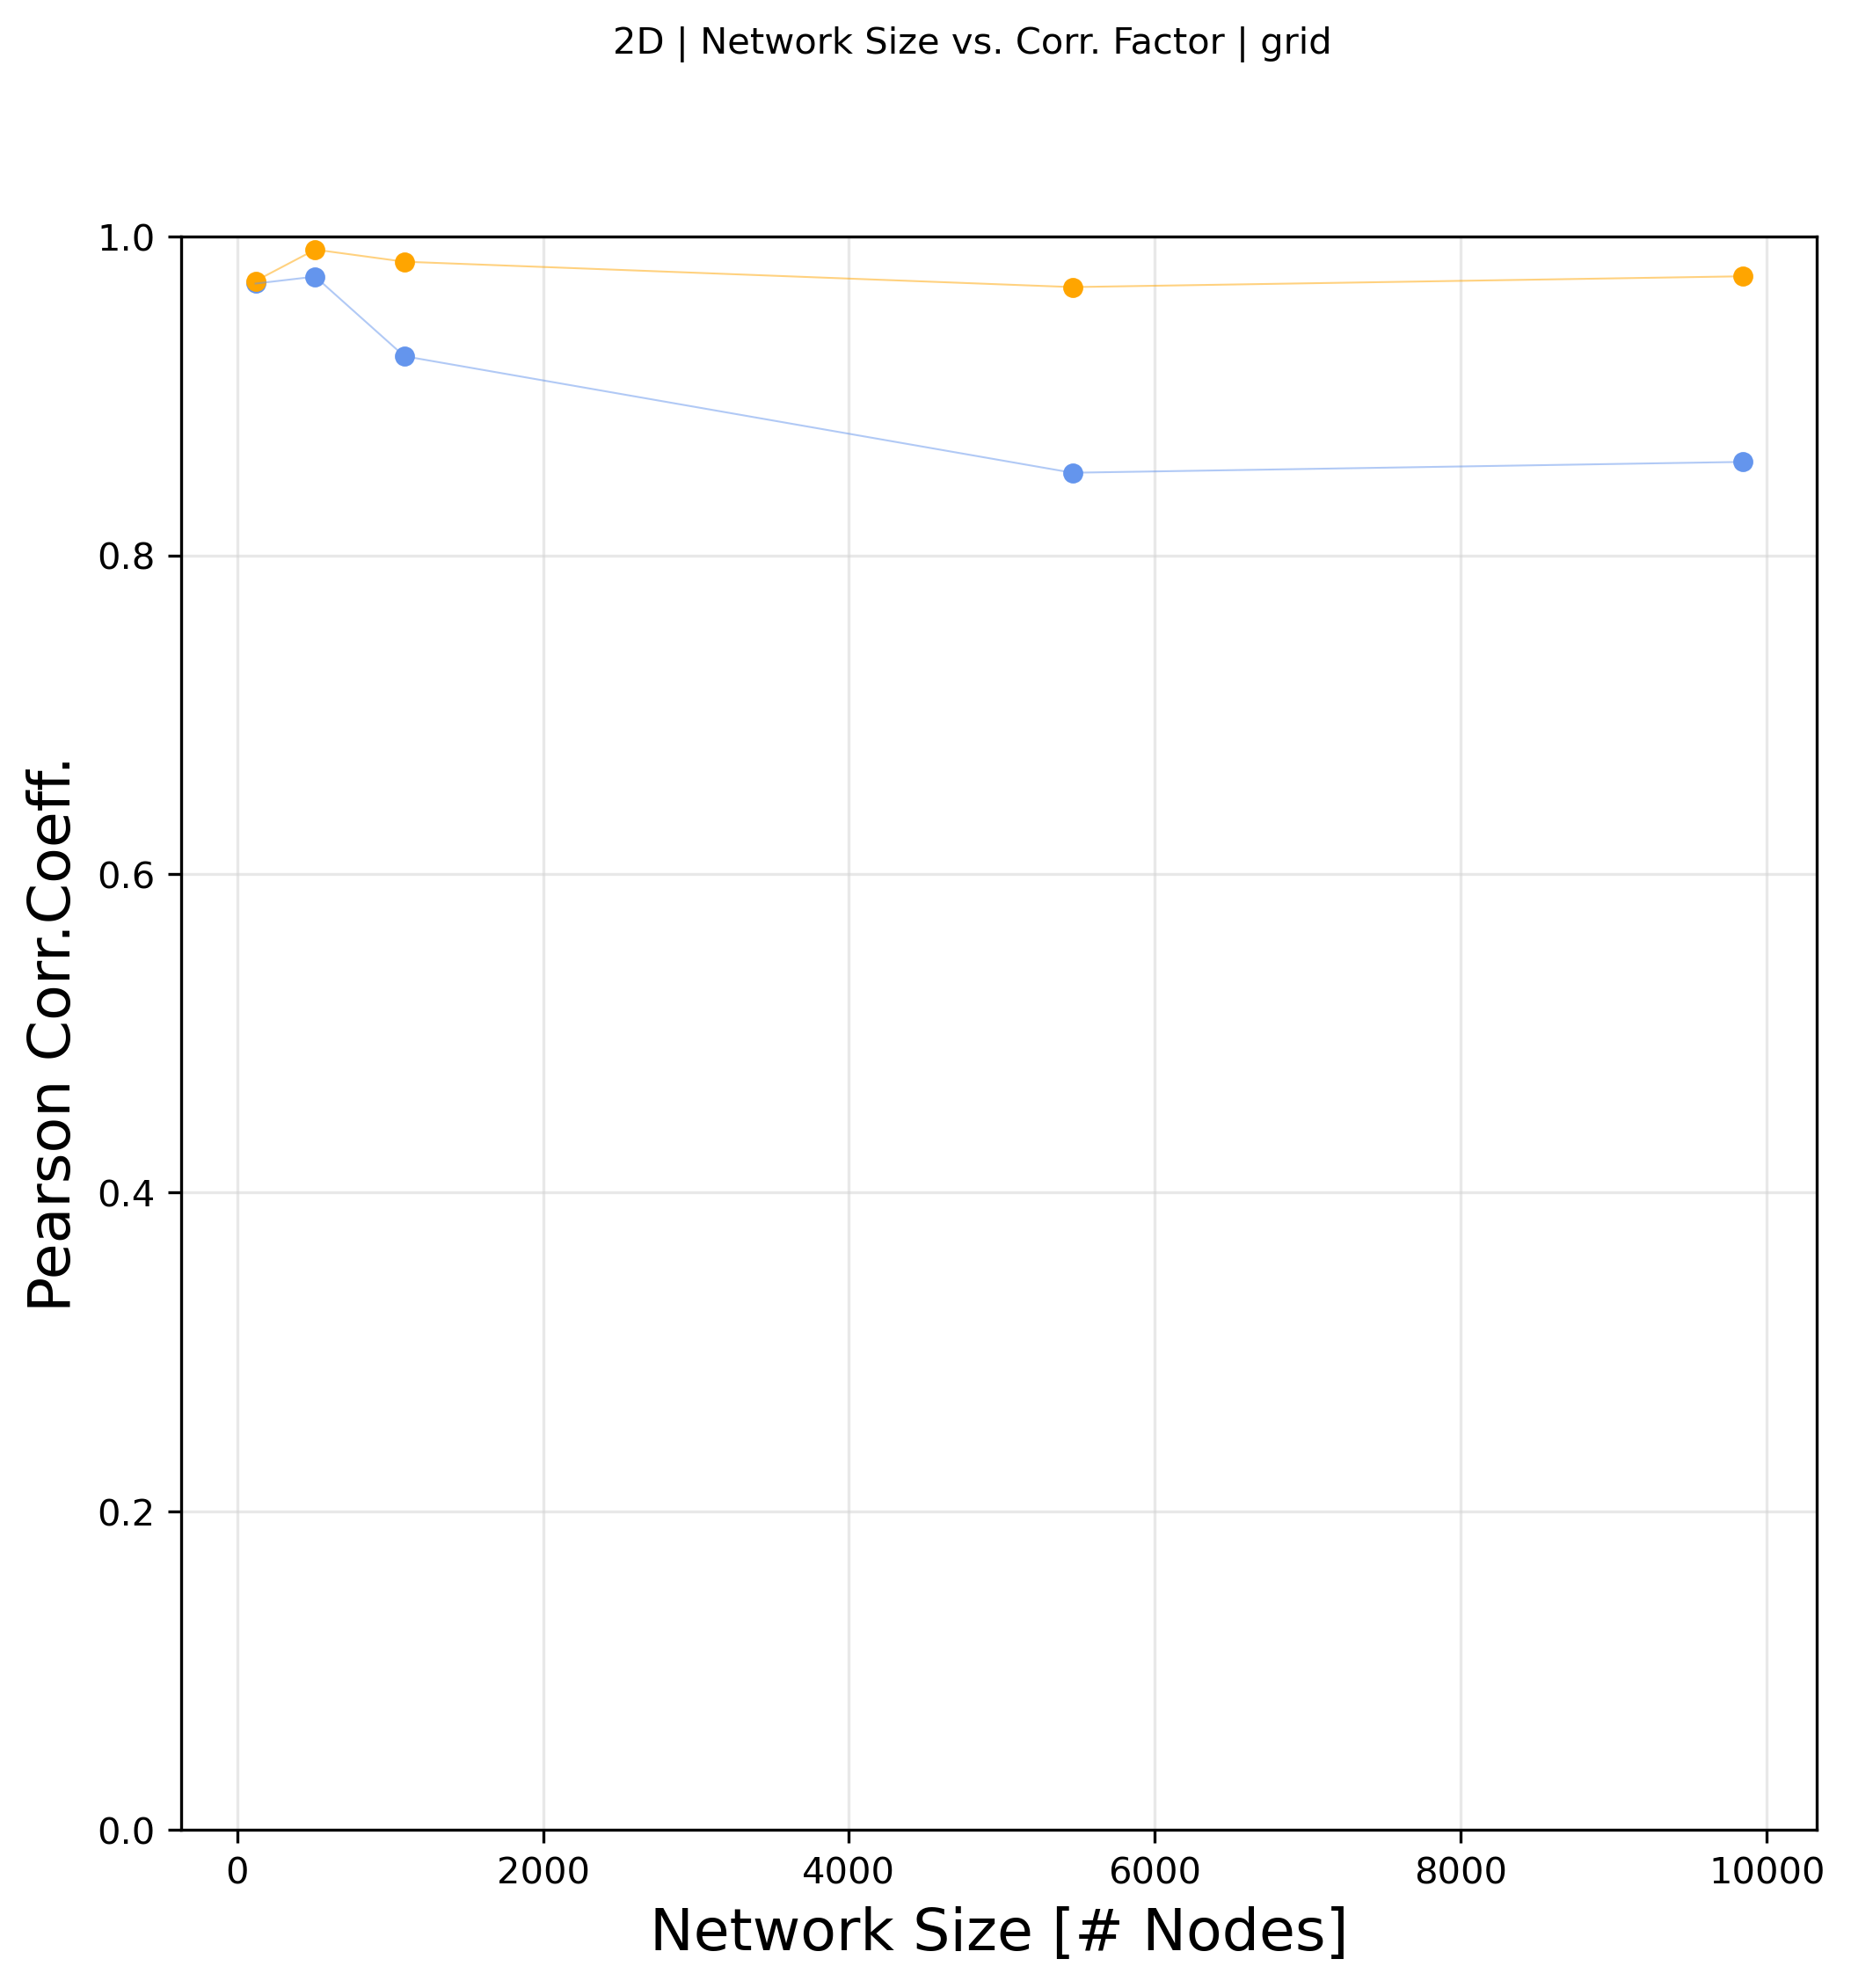

In [64]:
# Network size vs. Correlation Factor 
# with same running time

labelsize = 16 

x_spring = list(d_netsize_corr_spring.keys())
y_spring = list(d_netsize_corr_spring.values())
x_layout = list(d_netsize_corr_global.keys())
y_layout = list(d_netsize_corr_global.values())

fig = plt.figure(figsize=(8,8), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.ylabel("Pearson Corr.Coeff.", fontsize=labelsize)

plt.plot(x_spring,y_spring, '-', c = 'cornflowerblue', alpha = 0.5, linewidth=0.5)
plt.scatter(x_spring,y_spring, c = 'cornflowerblue', s = 20, alpha = 1.0)
plt.plot(x_layout,y_layout, '-', c = 'orange', alpha = 0.5, linewidth=0.5)
plt.scatter(x_layout,y_layout, c = 'orange', s = 20, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('2D | Network Size vs. Corr. Factor | '+organism, fontsize=10)
plt.ylim(ymin=0, ymax=1.0)

fig.savefig('output_plots/benchmark/upscaled_2D_CorrNetsize_'+feature+'_'+organism+'.png')

## TIME / NETSIZE - saved values for diagram
+ for equal correlation coefficient

In [ ]:
d_netsize_corr = {121: , 
                    511: , 
                    1093: , 
                    5461: ,
                    9841: ,
                    19531:
                    }

# G L O B A L 
d_netsize_time_global = {121: 
                            511: 
                            1093: 
                            5461: 
                            9841: 
                            19531:
                           }


# S P R I N G 
d_netsize_corr_spring = {121: 
                            511: 
                            1093:
                            5461: 
                            9841:
                            19531:
                           }

_________
# 3D - Cube Grid
_________

In [32]:
def globallayout_3D(G,n_neighbors, spread, min_dist, metric):
    
    A = nx.adjacency_matrix(G)
    FM_m_array = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
    DM_rwr = pd.DataFrame(FM_m_array).T

    umap_rwr_3D = embed_umap_3D(DM_rwr, n_neighbors, spread, min_dist, metric)
    posG_umap_rwr = get_posG_3D(list(G.nodes()), umap_rwr_3D)
    posG_complete_umap_rwr = {key:posG_umap_rwr[key] for key in G.nodes()}

    df_posG = pd.DataFrame(posG_complete_umap_rwr).T
    x = df_posG.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_posG_norm = pd.DataFrame(x_scaled)

    posG_complete_umap_rwr_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values,df_posG_norm[2].values)))
    
    return posG_complete_umap_rwr_norm


def springlayout_3D(G, itr):

    posG_spring3D = nx.spring_layout(G, iterations = itr, dim = 3)

    df_posG = pd.DataFrame(posG_spring3D).T
    x = df_posG.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_posG_norm = pd.DataFrame(x_scaled)
    posG_spring3D_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values,df_posG_norm[2].values)))

    return posG_spring3D_norm


def pearson_corrcoef_3D(G, posG):

    dist_layout3D = {} 
    for p1,p2 in it.combinations(G.nodes(),2):
        dist_layout3D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2 + (posG[p1][1]-posG[p2][2])**2)

    dist_network = {}
    for a in nx.shortest_path_length(G):
        for n,spl in a[1].items():
            dist_network[(a[0],n)] = spl

    d_plot_layout = {}
    for spldist in range(1,int(max(dist_network.values()))+1):
        l_s = []
        for k, v in dist_network.items():
            if v == spldist:
                l_s.append(k)
        l_xy = []
        for nodes in l_s:
            if nodes in dist_layout3D.keys():
                dxy = dist_layout3D[nodes]
                l_xy.append(dxy)
        d_plot_layout[spldist] = l_xy

    l_medians_layout = []
    for k, v in d_plot_layout.items():
        l_medians_layout.append(statistics.median(v))

    x = np.array(range(1,int(max(dist_network.values()))+1))
    y = np.array(l_medians_layout)
    r_layout = np.corrcoef(x, y)

    return r_layout[0][1]

In [41]:
# 3D CUBE 
organism = 'grid'

feature = 'RWRvis'
r = .9
alpha = 1.0

# parameters (post - testing)
n_neighbors = 10
spread = 1
min_dist = 0.0
metric = 'cosine'
lnr = 1
nep = None

In [47]:
#########
# 1 0 0 
#########

G = nx.grid_graph([5,5,5],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_3D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=2500)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_3D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

RWR
Execution Time: 00:00:01
RWR corr coef:  0.991136860189808


SPRING
Execution Time: 00:00:01
SPRING corr coef:  0.9956010674921448


In [50]:
#########
# 5 0 0 
#########

G = nx.grid_graph([8,8,8],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_3D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=70)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_3D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

RWR
Execution Time: 00:00:02
RWR corr coef:  0.9916228955000962


SPRING
Execution Time: 00:00:02
SPRING corr coef:  0.920832381932166


In [93]:
#########
# 1 0 0 0 
#########

G = nx.grid_graph([10,10,10],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_3D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=150)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_3D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

RWR
Execution Time: 00:00:11
RWR corr coef:  0.9914383734976422


SPRING
Execution Time: 00:00:11
SPRING corr coef:  0.997333557420013


In [95]:
#########
# 2 0 0 0 
#########

G = nx.grid_graph([13,13,13],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_3D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=150)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_3D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

RWR
Execution Time: 00:02:37
RWR corr coef:  0.989837617417308


SPRING
Execution Time: 00:00:39
SPRING corr coef:  0.99686705112257


In [ ]:
#########
# 3 0 0 0 
#########

G = nx.grid_graph([15,15,15],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_3D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=150)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_3D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

In [ ]:
#########
# 4 0 0 0 
#########

G = nx.grid_graph([16,16,16],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_3D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=150)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_3D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

In [59]:
#########
# 5 0 0 0 
#########

G = nx.grid_graph([18,18,18],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_3D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=15)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_3D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

RWR
Execution Time: 00:00:28
RWR corr coef:  0.984158170054735


SPRING
Execution Time: 00:00:21
SPRING corr coef:  0.9321264398413462


In [ ]:
#################
#
# run on clip
#
#################


#########
# 1 0 0 0 0 
#########

G = nx.grid_graph([22,22,22],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_3D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=100)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_3D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

In [ ]:
#################
#
# run on clip
#
#################


#########
# 2 0 0 0 0 
#########

G = nx.grid_graph([28,28,28],periodic=False)

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

r_global = pearson_corrcoef_3D(G, posG_global)
print('RWR corr coef: ',r_global)

print('\n')
print('SPRING')
start = time.time()
posG_spring = springlayout_3D(G,itr=100)
end = time.time()
m,s = exec_time(start,end)

r_spring = pearson_corrcoef_3D(G,posG_spring)
print('SPRING corr coef: ',r_spring)

## CORR COEF / NETSIZE - saved values for diagram
+ for equal running time

In [67]:
d_3Dcube_netsize_time = {(5,5,5):1,
                           (8,8,8):2,
                           (10,10,10):12,
                           (13,13,13): ,
                           (15,15,15): ,
                           (18,18,18):28,
                           #(22,22,22):      # 249, #4min 9s
                           #(28,28,28):
                          }

# G L O B A L 
d_3Dcube_netsize_corr_global = {(5,5,5):0.991136860189808,
                           (8,8,8):0.9916228955000962,
                           (10,10,10):0.9914383734976422,
                           (13,13,13): ,
                           (15,15,15): ,
                           (18,18,18):0.984158170054735,
                           #(22,22,22):    #0.9585264524289082,
                           #(28,28,28):
                           }

# S P R I N G
d_3Dcube_netsize_corr_spring = {(5,5,5):0.9956010674921448,
                           (8,8,8):0.920832381932166,
                           (10,10,10):0.9970092978236464,       
                           (13,13,13): ,
                           (15,15,15): ,
                           (18,18,18):0.8803501800947585,
                           #(22,22,22):    #0.9481960547864228,
                           #(28,28,28):
                           }

In [91]:
# Network size vs. Correlation Factor 
# with same running time

labelsize = 16 

x_cube = []
for k in d_3Dcube_netsize_time.keys():
    x_cube.append(k[0]**3)
    
x_spring = x_cube
y_spring = list(d_3Dcube_netsize_corr_spring.values())
x_layout = x_cube
y_layout = list(d_3Dcube_netsize_corr_global.values())

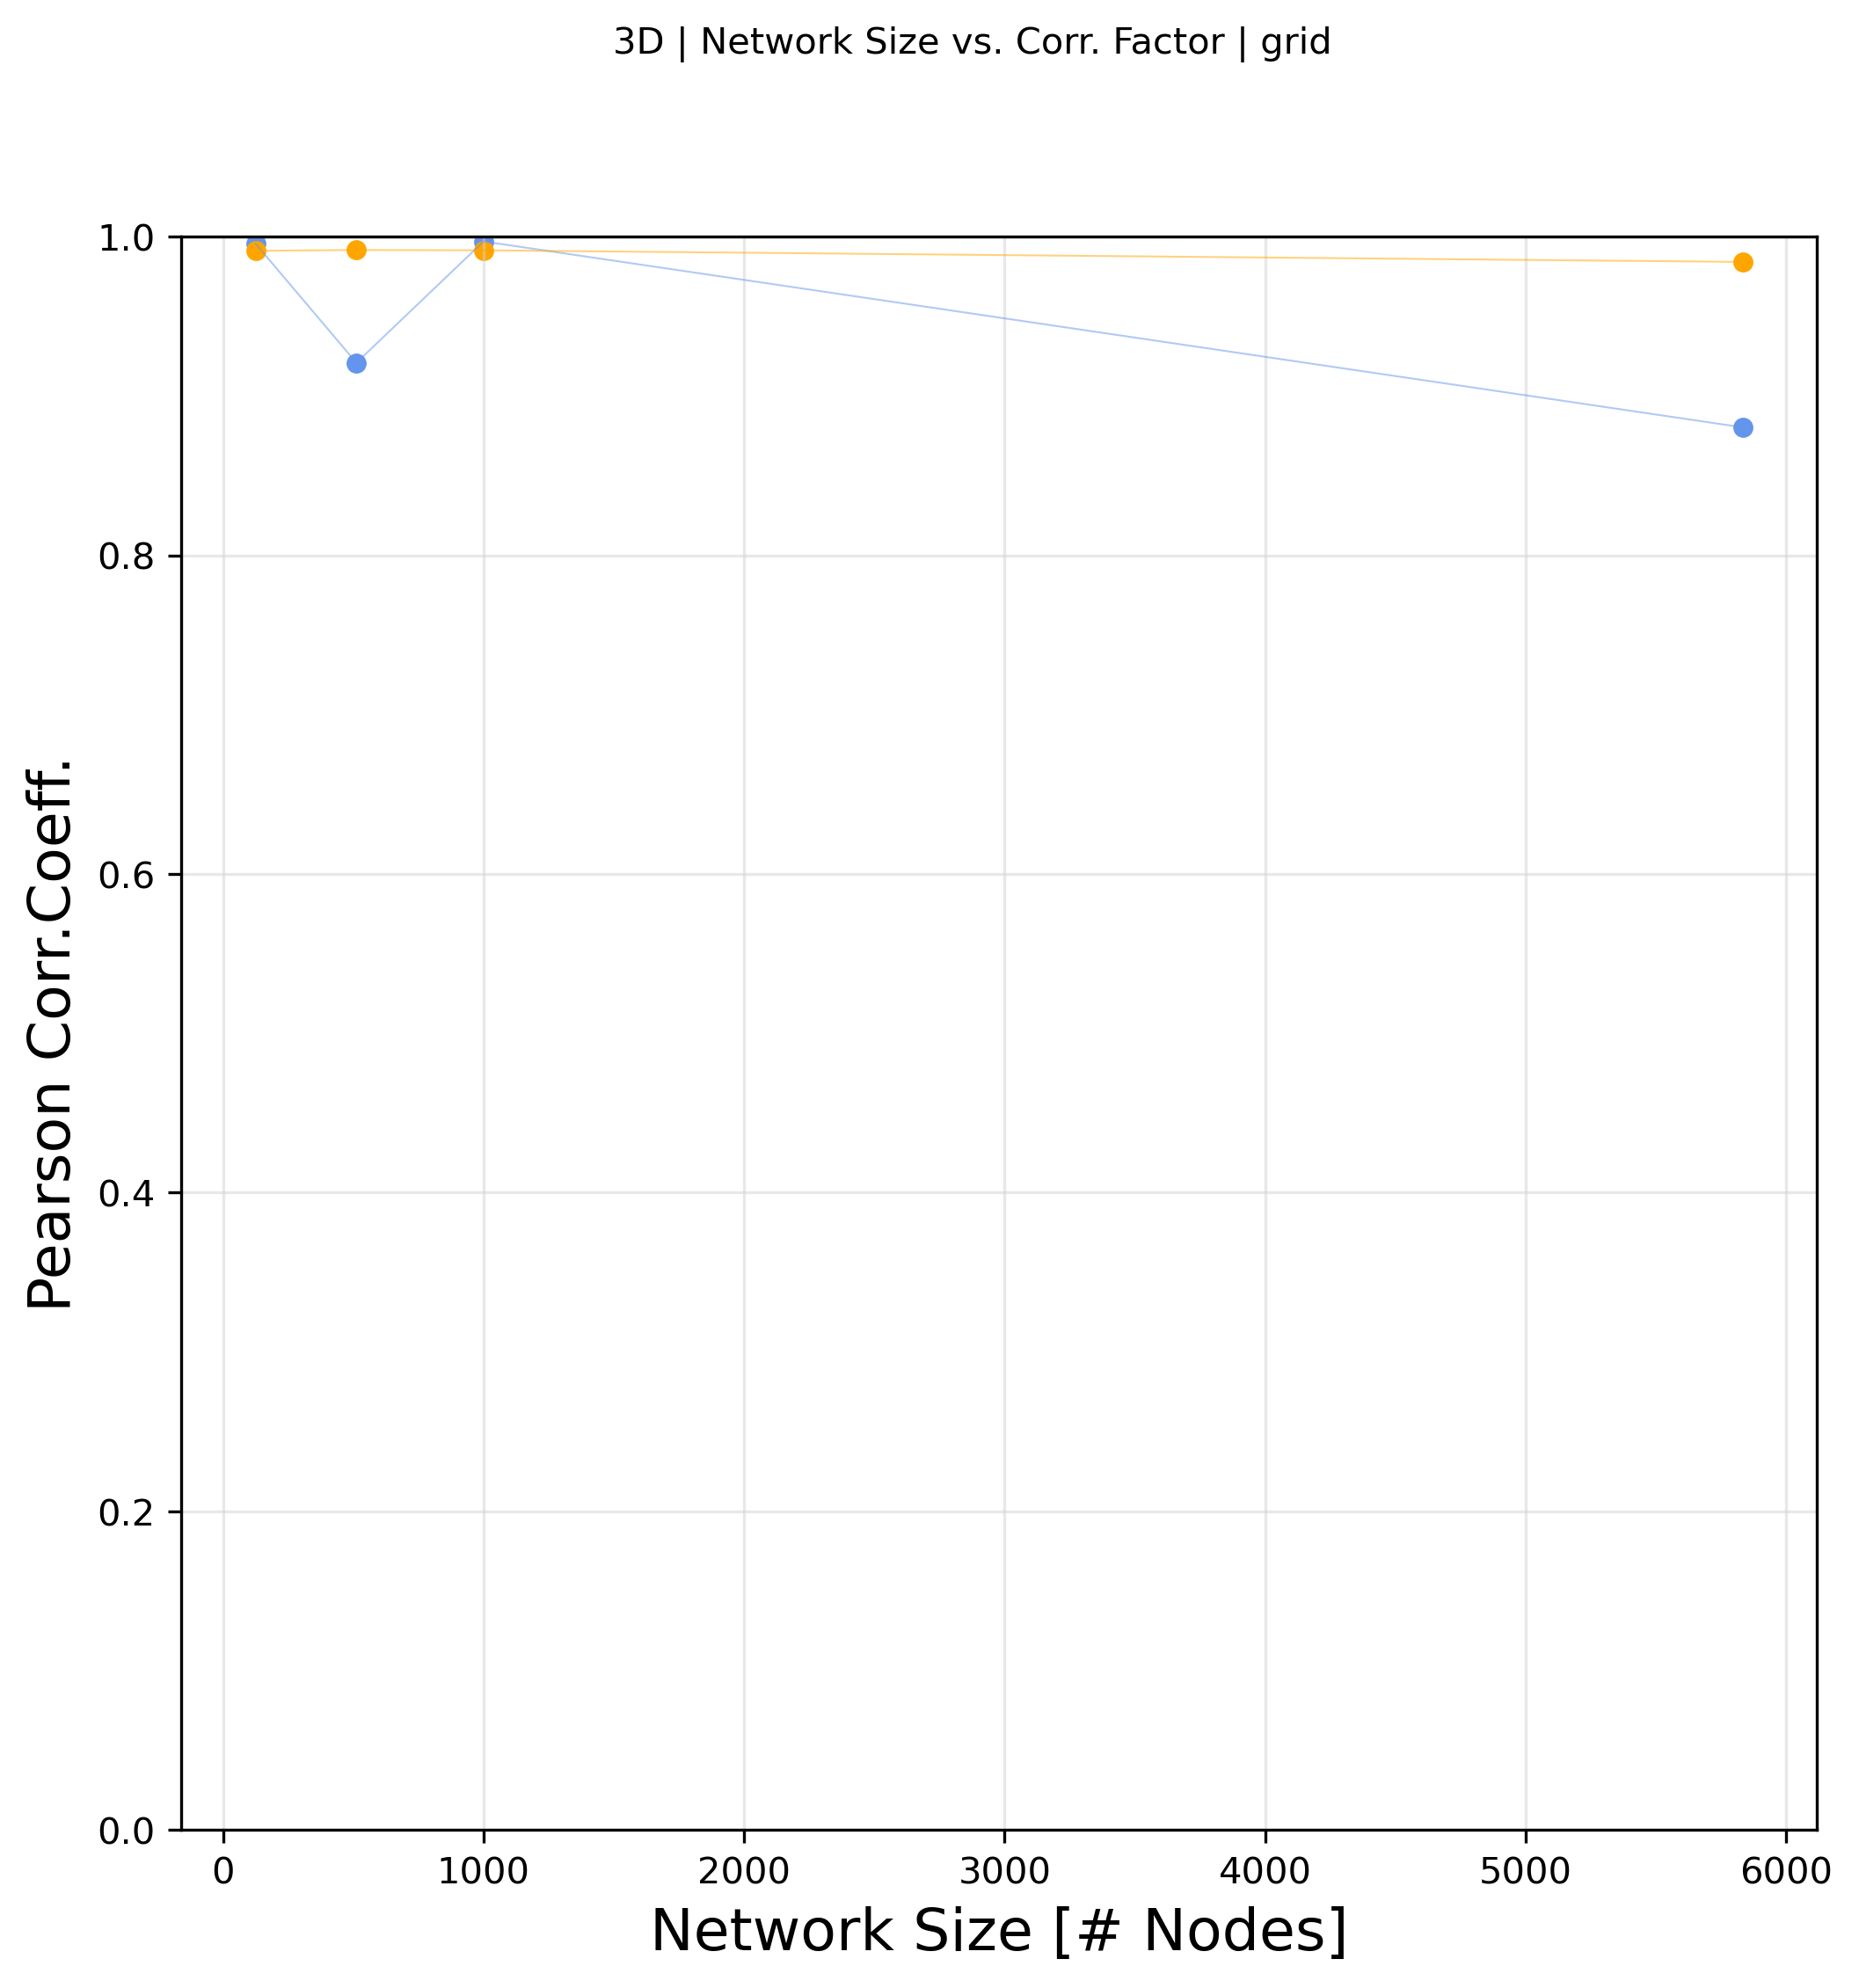

In [92]:

fig = plt.figure(figsize=(8,8), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.ylabel("Pearson Corr.Coeff.", fontsize=labelsize)

plt.plot(x_spring,y_spring, '-', c = 'cornflowerblue', alpha = 0.5, linewidth=0.5)
plt.scatter(x_spring,y_spring, c = 'cornflowerblue', s = 20, alpha = 1.0)
plt.plot(x_layout,y_layout, '-', c = 'orange', alpha = 0.5, linewidth=0.5)
plt.scatter(x_layout,y_layout, c = 'orange', s = 20, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('3D | Network Size vs. Corr. Factor | '+organism, fontsize=10)
plt.ylim(ymin=0, ymax=1.0)

fig.savefig('output_plots/benchmark/upscaled_3D_CorrNetsize_'+feature+'_'+organism+'.png')

## TIME / NETSIZE - saved values for diagram
+ for equal correlation coefficient

In [ ]:
# Network size vs. Time
# with same correlation factor 

labelsize= 14

x_spring = list(d_netsize_branch_all.keys())
y_spring = list(d_walltime_spring_all.values())
x_layout = list(d_netsize_branch_all.keys())
y_layout = list(d_walltime_layout_all.values())

fig = plt.figure(figsize=(8,8), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.ylabel("Time [s]", fontsize=labelsize)

plt.plot(x_spring,y_spring, '-', c = 'cornflowerblue', alpha = 0.3)
plt.scatter(x_spring,y_spring, c = 'cornflowerblue', s = 30, alpha = 1.0)
plt.plot(x_layout,y_layout, '-', c = 'orange', alpha = 0.3)
plt.scatter(x_layout,y_layout, c = 'orange', s = 30, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('2D | Network Size vs. Corr. Factor'+organism, fontsize=10)
plt.ylim(ymin=0, ymax=1.0)

fig.savefig('output_plots/benchmark/upscale_TimeNetdist_'+feature+'_'+organism+'.png')

_________
# 3D - Torus
_________

In [33]:
# 3D CUBE 

organism = 'torus'

### GLOBAL LAYOUT

In [4]:
feature = 'RWRvis'
r = .9
alpha = 1.0

n_neighbors = 20
spread = 1
min_dist = 0.0
metric = 'cosine'
lnr = 1
nep = None

In [ ]:
G = nx.grid_2d_graph(12,8,periodic=True)

start = time.time()

A = nx.adjacency_matrix(G)
FM_m_array = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
DM_rwr = pd.DataFrame(FM_m_array).T

print('RWR embedding')
umap_rwr_3D = embed_umap_3D(DM_rwr, n_neighbors, spread, min_dist, metric)
posG_umap_rwr = get_posG_3D(list(G.nodes()), umap_rwr_3D)
posG_complete_umap_rwr = {key:posG_umap_rwr[key] for key in G.nodes()}

df_posG = pd.DataFrame(posG_complete_umap_rwr).T
x = df_posG.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_posG_norm = pd.DataFrame(x_scaled)

posG_complete_umap_rwr_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values,df_posG_norm[2].values)))
end = time.time()
print('RWR embedding done')

#===========================
# walltime
#===========================
m,s = exec_time(start,end)

#===========================
# corr.coeff.
#===========================
posG = posG_complete_umap_rwr_norm
dist_layout3D = {} 
for p1,p2 in it.combinations(G.nodes(),2):
    dist_layout3D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2 + (posG[p1][1]-posG[p2][2])**2)

print('prep network distance')
dist_network = {}
for a in nx.shortest_path_length(G):
    for n,spl in a[1].items():
        dist_network[(a[0],n)] = spl

print('prep layout distance')
d_plot_layout = {}
for spldist in range(1,int(max(dist_network.values()))+1):
    l_s = []
    for k, v in dist_network.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        if nodes in dist_layout3D.keys():
            dxy = dist_layout3D[nodes]
            l_xy.append(dxy)
    d_plot_layout[spldist] = l_xy

print('calculate corr. coef.')
l_medians_layout = []
for k, v in d_plot_layout.items():
    l_medians_layout.append(statistics.median(v))
    
x = np.array(range(1,int(max(dist_network.values()))+1))
y = np.array(l_medians_layout)
r_layout = np.corrcoef(x, y)

print('RWR Pearson Correlation Factor: ', r_layout[0][1])

In [ ]:
G = nx.grid_2d_graph(42,12,periodic=True)

start = time.time()

A = nx.adjacency_matrix(G)
FM_m_array = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
DM_rwr = pd.DataFrame(FM_m_array).T

print('RWR embedding')
umap_rwr_3D = embed_umap_3D(DM_rwr, n_neighbors, spread, min_dist, metric)
posG_umap_rwr = get_posG_3D(list(G.nodes()), umap_rwr_3D)
posG_complete_umap_rwr = {key:posG_umap_rwr[key] for key in G.nodes()}

df_posG = pd.DataFrame(posG_complete_umap_rwr).T
x = df_posG.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_posG_norm = pd.DataFrame(x_scaled)

posG_complete_umap_rwr_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values,df_posG_norm[2].values)))
end = time.time()
print('RWR embedding done')

#===========================
# walltime
#===========================
m,s = exec_time(start,end)

#===========================
# corr.coeff.
#===========================
posG = posG_complete_umap_rwr_norm
dist_layout3D = {} 
for p1,p2 in it.combinations(G.nodes(),2):
    dist_layout3D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2 + (posG[p1][1]-posG[p2][2])**2)

print('prep network distance')
dist_network = {}
for a in nx.shortest_path_length(G):
    for n,spl in a[1].items():
        dist_network[(a[0],n)] = spl

print('prep layout distance')
d_plot_layout = {}
for spldist in range(1,int(max(dist_network.values()))+1):
    l_s = []
    for k, v in dist_network.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        if nodes in dist_layout3D.keys():
            dxy = dist_layout3D[nodes]
            l_xy.append(dxy)
    d_plot_layout[spldist] = l_xy
    
l_medians_layout = []
for k, v in d_plot_layout.items():
    l_medians_layout.append(statistics.median(v))
    
print('calculate corr. coef.')
x = np.array(range(1,int(max(dist_network.values()))+1))
y = np.array(l_medians_layout)
r_layout = np.corrcoef(x, y)

print('RWR Pearson Correlation Factor: ', r_layout[0][1])

In [ ]:
G = nx.grid_2d_graph(44,22,periodic=True)

start = time.time()

A = nx.adjacency_matrix(G)
FM_m_array = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
DM_rwr = pd.DataFrame(FM_m_array).T

print('RWR embedding')
umap_rwr_3D = embed_umap_3D(DM_rwr, n_neighbors, spread, min_dist, metric)
posG_umap_rwr = get_posG_3D(list(G.nodes()), umap_rwr_3D)
posG_complete_umap_rwr = {key:posG_umap_rwr[key] for key in G.nodes()}

df_posG = pd.DataFrame(posG_complete_umap_rwr).T
x = df_posG.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_posG_norm = pd.DataFrame(x_scaled)

posG_complete_umap_rwr_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values,df_posG_norm[2].values)))
end = time.time()
print('RWR embedding done')

#===========================
# walltime
#===========================
m,s = exec_time(start,end)

#===========================
# corr.coeff.
#===========================
posG = posG_complete_umap_rwr_norm
dist_layout3D = {} 
for p1,p2 in it.combinations(G.nodes(),2):
    dist_layout3D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2 + (posG[p1][1]-posG[p2][2])**2)

print('prep network distance')
dist_network = {}
for a in nx.shortest_path_length(G):
    for n,spl in a[1].items():
        dist_network[(a[0],n)] = spl

print('prep layout distance')
d_plot_layout = {}
for spldist in range(1,int(max(dist_network.values()))+1):
    l_s = []
    for k, v in dist_network.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        if nodes in dist_layout3D.keys():
            dxy = dist_layout3D[nodes]
            l_xy.append(dxy)
    d_plot_layout[spldist] = l_xy
    
l_medians_layout = []
for k, v in d_plot_layout.items():
    l_medians_layout.append(statistics.median(v))
    
print('calculate corr. coef.')
x = np.array(range(1,int(max(dist_network.values()))+1))
y = np.array(l_medians_layout)
r_layout = np.corrcoef(x, y)

print('RWR Pearson Correlation Factor: ', r_layout[0][1])

In [ ]:
G = nx.grid_2d_graph(90,55,periodic=True)

print('--- RWR ---')

start = time.time()

A = nx.adjacency_matrix(G)
FM_m_array = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
DM_rwr = pd.DataFrame(FM_m_array).T

print('RWR embedding')
umap_rwr_3D = embed_umap_3D(DM_rwr, n_neighbors, spread, min_dist, metric)
posG_umap_rwr = get_posG_3D(list(G.nodes()), umap_rwr_3D)
posG_complete_umap_rwr = {key:posG_umap_rwr[key] for key in G.nodes()}

df_posG = pd.DataFrame(posG_complete_umap_rwr).T
x = df_posG.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_posG_norm = pd.DataFrame(x_scaled)

posG_complete_umap_rwr_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values,df_posG_norm[2].values)))
end = time.time()
print('RWR embedding done')

#===========================
# walltime
#===========================
m,s = exec_time(start,end)

#===========================
# corr.coeff.
#===========================
posG = posG_complete_umap_rwr_norm
dist_layout3D = {} 
for p1,p2 in it.combinations(G.nodes(),2):
    dist_layout3D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2 + (posG[p1][1]-posG[p2][2])**2)

print('prep network distance')
dist_network = {}
for a in nx.shortest_path_length(G):
    for n,spl in a[1].items():
        dist_network[(a[0],n)] = spl

print('prep layout distance')
d_plot_layout = {}
for spldist in range(1,int(max(dist_network.values()))+1):
    l_s = []
    for k, v in dist_network.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        if nodes in dist_layout3D.keys():
            dxy = dist_layout3D[nodes]
            l_xy.append(dxy)
    d_plot_layout[spldist] = l_xy
    
l_medians_layout = []
for k, v in d_plot_layout.items():
    l_medians_layout.append(statistics.median(v))
    
print('calculate corr. coef.')
x = np.array(range(1,int(max(dist_network.values()))+1))
y = np.array(l_medians_layout)
r_layout = np.corrcoef(x, y)

print('RWR Pearson Correlation Factor: ', r_layout[0][1])

In [ ]:
G = nx.grid_2d_graph(125,80,periodic=True)

start = time.time()

A = nx.adjacency_matrix(G)
FM_m_array = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
DM_rwr = pd.DataFrame(FM_m_array).T

print('RWR embedding')
umap_rwr_3D = embed_umap_3D(DM_rwr, n_neighbors, spread, min_dist, metric)
posG_umap_rwr = get_posG_3D(list(G.nodes()), umap_rwr_3D)
posG_complete_umap_rwr = {key:posG_umap_rwr[key] for key in G.nodes()}

df_posG = pd.DataFrame(posG_complete_umap_rwr).T
x = df_posG.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_posG_norm = pd.DataFrame(x_scaled)

posG_complete_umap_rwr_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values,df_posG_norm[2].values)))
end = time.time()
print('RWR embedding done')

#===========================
# walltime
#===========================
m,s = exec_time(start,end)

#===========================
# corr.coeff.
#===========================
posG = posG_complete_umap_rwr_norm
dist_layout3D = {} 
for p1,p2 in it.combinations(G.nodes(),2):
    dist_layout3D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2 + (posG[p1][1]-posG[p2][2])**2)

print('prep network distance')
dist_network = {}
for a in nx.shortest_path_length(G):
    for n,spl in a[1].items():
        dist_network[(a[0],n)] = spl

print('prep layout distance')
d_plot_layout = {}
for spldist in range(1,int(max(dist_network.values()))+1):
    l_s = []
    for k, v in dist_network.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        if nodes in dist_layout3D.keys():
            dxy = dist_layout3D[nodes]
            l_xy.append(dxy)
    d_plot_layout[spldist] = l_xy
    
l_medians_layout = []
for k, v in d_plot_layout.items():
    l_medians_layout.append(statistics.median(v))
    
print('calculate corr. coef.')
x = np.array(range(1,int(max(dist_network.values()))+1))
y = np.array(l_medians_layout)
r_layout = np.corrcoef(x, y)

print('RWR Pearson Correlation Factor: ', r_layout[0][1])

In [ ]:
G = nx.grid_2d_graph(182,110,periodic=True)

start = time.time()

A = nx.adjacency_matrix(G)
FM_m_array = rnd_walk_matrix2(A, r, alpha, len(G.nodes()))
DM_rwr = pd.DataFrame(FM_m_array).T

print('RWR embedding')
umap_rwr_3D = embed_umap_3D(DM_rwr, n_neighbors, spread, min_dist, metric)
posG_umap_rwr = get_posG_3D(list(G.nodes()), umap_rwr_3D)
posG_complete_umap_rwr = {key:posG_umap_rwr[key] for key in G.nodes()}

df_posG = pd.DataFrame(posG_complete_umap_rwr).T
x = df_posG.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_posG_norm = pd.DataFrame(x_scaled)

posG_complete_umap_rwr_norm = dict(zip(list(G.nodes()),zip(df_posG_norm[0].values,df_posG_norm[1].values,df_posG_norm[2].values)))
end = time.time()
print('RWR embedding done')

#===========================
# walltime
#===========================
m,s = exec_time(start,end)

#===========================
# corr.coeff.
#===========================
posG = posG_complete_umap_rwr_norm
dist_layout3D = {} 
for p1,p2 in it.combinations(G.nodes(),2):
    dist_layout3D[(p1,p2)] = np.sqrt((posG[p1][0]-posG[p2][0])**2 + (posG[p1][1]-posG[p2][1])**2 + (posG[p1][1]-posG[p2][2])**2)

print('prep network distance')
dist_network = {}
for a in nx.shortest_path_length(G):
    for n,spl in a[1].items():
        dist_network[(a[0],n)] = spl

print('prep layout distance')
d_plot_layout = {}
for spldist in range(1,int(max(dist_network.values()))+1):
    l_s = []
    for k, v in dist_network.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        if nodes in dist_layout3D.keys():
            dxy = dist_layout3D[nodes]
            l_xy.append(dxy)
    d_plot_layout[spldist] = l_xy
    
l_medians_layout = []
for k, v in d_plot_layout.items():
    l_medians_layout.append(statistics.median(v))
    
print('calculate corr. coef.')
x = np.array(range(1,int(max(dist_network.values()))+1))
y = np.array(l_medians_layout)
r_layout = np.corrcoef(x, y)

print('RWR Pearson Correlation Factor: ', r_layout[0][1])

## CORR COEF / NETSIZE - saved values for diagram
+ for equal running time

In [46]:
d_3Dtor_netsize_time_global = {
                                }

In [47]:
d_3Dtor_netsize_corr_global = {
                               }

In [48]:
d_3Dtor_netsize_time_spring = {
                              }

In [49]:
d_3Dtor_netsize_corr_spring = {
                                }

In [ ]:
# Network size vs. Correlation Factor 
# with same running time

labelsize = 16 

x_spring = list(d_3Dtor_netsize_corr_spring.keys())
y_spring = list(d_3Dtor_netsize_corr_spring.values())
x_layout = list(d_3Dtor_netsize_corr_global.keys())
y_layout = list(d_3Dtor_netsize_corr_global.values())

fig = plt.figure(figsize=(8,8), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.ylabel("Pearson Corr.Coeff.", fontsize=labelsize)

plt.plot(x_spring,y_spring, '-', c = 'cornflowerblue', alpha = 0.5, linewidth=0.5)
plt.scatter(x_spring,y_spring, c = 'cornflowerblue', s = 20, alpha = 1.0)
plt.plot(x_layout,y_layout, '-', c = 'orange', alpha = 0.5, linewidth=0.5)
plt.scatter(x_layout,y_layout, c = 'orange', s = 20, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('3D | Network Size vs. Corr. Factor | '+organism, fontsize=10)
plt.ylim(ymin=0, ymax=1.0)

fig.savefig('output_plots/benchmark/upscaled_3D_CorrNetsize_'+feature+'_'+organism+'.png')

## TIME / NETSIZE - saved values for diagram
+ for equal correlation coefficient

In [ ]:
# Network size vs. Time
# with same correlation factor 

labelsize= 14

x_spring = list(d_netsize_branch_all.keys())
y_spring = list(d_walltime_spring_all.values())
x_layout = list(d_netsize_branch_all.keys())
y_layout = list(d_walltime_layout_all.values())

fig = plt.figure(figsize=(8,8), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.ylabel("Time [s]", fontsize=labelsize)

plt.plot(x_spring,y_spring, '-', c = 'cornflowerblue', alpha = 0.3)
plt.scatter(x_spring,y_spring, c = 'cornflowerblue', s = 30, alpha = 1.0)
plt.plot(x_layout,y_layout, '-', c = 'orange', alpha = 0.3)
plt.scatter(x_layout,y_layout, c = 'orange', s = 30, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('2D | Network Size vs. Corr. Factor'+organism, fontsize=10)
plt.ylim(ymin=0, ymax=1.0)

fig.savefig('output_plots/benchmark/upscale_TimeNetdist_'+feature+'_'+organism+'.png')

# REST / OTHERS 

________
________
# CAYLEY TREE network sizes
________
________

In [17]:
# TREE GRAPH - set network sizes 

# get number of nodes with predefined generations and branching factor : 
generations = 8
branching = 2

lst = []
for i in range(generations+1):
    #print(i)
    j=branching**i
    lst.append(j)
    i+=1

print('number of nodes required for branching factor r =',branching,': ',(sum(lst)))

number of nodes required for branching factor r = 2 :  511


In [4]:
from networkx.drawing.nx_agraph import graphviz_layout

organism = 'tree'
n = int((sum(lst)))
G = nx.full_rary_tree(branching,n)

print('Network:', organism)
print('Number of nodes: %s' %len(list(G.nodes())))
print('Number of edges: %s' %len(list(G.edges())))
print('Network density: %.11f%%' %(200.*len(list(G.edges()))/(len(list(G.nodes()))*len(list(G.nodes()))-1)))

#pos = graphviz_layout(G, prog="twopi", args="")
#plt.figure(figsize=(16,16))
#nx.draw(G, pos, node_size=10, alpha=0.5, node_color="blue", with_labels=False)
#plt.axis("equal")
#plt.show()

Network: tree
Number of nodes: 1093
Number of edges: 1092
Network density: 0.18281535649%
